# **Machine Learning on Big Data Using UNSW Datasets**  

# **Initiate and Configure Spark**

In [ ]:
#Installing Pyspark
!pip3 install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 29 kB/s 
     |████████████████████████████████| 199 kB 68.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=dd82c7d0bf0e64cab2d8bfa497dcdd7f20beb99d96d07db6d90261e12cc93f18
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
#Setup a sparksession
from pyspark.sql import SparkSession 
spark = SparkSession.builder \
                    .master("local[*]") \
                    .appName("UNSW_Datasheets") \
                    .getOrCreate()

# **Mount Drive**

In [ ]:
#Upload the dataset file to the drive
#By mounting the drive you can use a dataset file from Google Drive.

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# **Load Data**

In [ ]:
#Analyzing datasheets
UNSW_Datasheets = spark.read.csv("/content/drive/MyDrive/UNSW dataset/UNSW-NB15.csv",inferSchema=True,header=False)

In [ ]:
#Displaying datasheets
UNSW_Datasheets.show(5)

+----------+-----+-------------+-----+---+---+-----------+-----+------+---+----+----+----+----+---------+---------+----+----+----+----+----------+----------+----+----+----+----+---------+---------+----------+----------+---------+----------+------------+------------+------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|       _c0|  _c1|          _c2|  _c3|_c4|_c5|        _c6|  _c7|   _c8|_c9|_c10|_c11|_c12|_c13|     _c14|     _c15|_c16|_c17|_c18|_c19|      _c20|      _c21|_c22|_c23|_c24|_c25|     _c26|     _c27|      _c28|      _c29|     _c30|      _c31|        _c32|        _c33|        _c34|_c35|_c36|_c37|_c38|_c39|_c40|_c41|_c42|_c43|_c44|_c45|_c46|_c47|_c48|
+----------+-----+-------------+-----+---+---+-----------+-----+------+---+----+----+----+----+---------+---------+----+----+----+----+----------+----------+----+----+----+----+---------+---------+----------+----------+---------+----------+------------+------------+------------+----+----+----+----+-

In [ ]:
#As a result, there are no feature names in the columns, thus we used todf function to apply feature names to the columns.

datasheets = UNSW_Datasheets.toDF('srcip','sport','dstip','dsport','proto','state','dur','sbytes','dbytes','sttl','dttl','sloss','dloss','service','Sload','Dload','Spkts',
 'Dpkts','swin','dwin','stcpb','dtcpb','smeansz','dmeansz','trans_depth','res_bdy_len','Sjit','Djit','Stime','Ltime','Sintpkt','Dintpkt','tcprtt','synack',
 'ackdat','is_sm_ips_ports','ct_state_ttl','ct_flw_http_mthd','is_ftp_login','ct_ftp_cmd','ct_srv_src','ct_srv_dst','ct_dst_ltm','ct_src_ltm','ct_src_dport_ltm',
 'ct_dst_sport_ltm','ct_dst_src_ltm','attack_cat','Label')

In [ ]:
#The column containing the original feature names is shown.
datasheets.show(5)

+----------+-----+-------------+------+-----+-----+-----------+------+------+----+----+-----+-----+-------+---------+---------+-----+-----+----+----+----------+----------+-------+-------+-----------+-----------+---------+---------+----------+----------+---------+----------+------------+------------+------------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+----------------+--------------+----------+-----+
|     srcip|sport|        dstip|dsport|proto|state|        dur|sbytes|dbytes|sttl|dttl|sloss|dloss|service|    Sload|    Dload|Spkts|Dpkts|swin|dwin|     stcpb|     dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|     Sjit|     Djit|     Stime|     Ltime|  Sintpkt|   Dintpkt|      tcprtt|      synack|      ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|Label|
+----------+

In [ ]:
#The schemas of the columns are displayed.
datasheets.printSchema()

root
 |-- srcip: string (nullable = true)
 |-- sport: integer (nullable = true)
 |-- dstip: string (nullable = true)
 |-- dsport: integer (nullable = true)
 |-- proto: string (nullable = true)
 |-- state: string (nullable = true)
 |-- dur: double (nullable = true)
 |-- sbytes: integer (nullable = true)
 |-- dbytes: integer (nullable = true)
 |-- sttl: integer (nullable = true)
 |-- dttl: integer (nullable = true)
 |-- sloss: integer (nullable = true)
 |-- dloss: integer (nullable = true)
 |-- service: string (nullable = true)
 |-- Sload: double (nullable = true)
 |-- Dload: double (nullable = true)
 |-- Spkts: integer (nullable = true)
 |-- Dpkts: integer (nullable = true)
 |-- swin: integer (nullable = true)
 |-- dwin: integer (nullable = true)
 |-- stcpb: long (nullable = true)
 |-- dtcpb: long (nullable = true)
 |-- smeansz: integer (nullable = true)
 |-- dmeansz: integer (nullable = true)
 |-- trans_depth: integer (nullable = true)
 |-- res_bdy_len: integer (nullable = true)
 |-- S

# **Machine Learning - Binary Classifier**

In [ ]:
#The datasheets contains 49 distinct features. 
#For classification purpose we are selecting the particular features
#We are using the target column as the Label column for binary classification.

Binary_class_datasheets = datasheets.select("sport","dsport","dur","Sload","Dload","Spkts","Dpkts","swin","dwin","stcpb","dtcpb","smeansz","dmeansz","Label")

In [ ]:
#Look over the null values and nan values in our dataset
from pyspark.sql.functions import col,isnan, when, count
Binary_class_datasheets.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in Binary_class_datasheets.columns]).show()

+-----+------+---+-----+-----+-----+-----+----+----+-----+-----+-------+-------+-----+
|sport|dsport|dur|Sload|Dload|Spkts|Dpkts|swin|dwin|stcpb|dtcpb|smeansz|dmeansz|Label|
+-----+------+---+-----+-----+-----+-----+----+----+-----+-----+-------+-------+-----+
|    0|     0|  0|    0|    0|    0|    0|   0|   0|    0|    0|      0|      0|    0|
+-----+------+---+-----+-----+-----+-----+----+----+-----+-----+-------+-------+-----+



In [ ]:
#Examine each column's statistics using describe function
Binary_class_datasheets.describe().show()

+-------+------------------+------------------+------------------+--------------------+-----------------+-----------------+------------------+------------------+------------------+--------------------+--------------------+------------------+------------------+-------------------+
|summary|             sport|            dsport|               dur|               Sload|            Dload|            Spkts|             Dpkts|              swin|              dwin|               stcpb|               dtcpb|           smeansz|           dmeansz|              Label|
+-------+------------------+------------------+------------------+--------------------+-----------------+-----------------+------------------+------------------+------------------+--------------------+--------------------+------------------+------------------+-------------------+
|  count|           2539739|           2539739|           2539739|             2539739|          2539739|          2539739|           2539739|           2539

# **1.1 Data Cleaning**

In [ ]:
#In the columns minimum values are 0
#For the next step, we must set all minimum values to 0 as Nan.

import numpy as np
Binary_class_datasheets=Binary_class_datasheets.withColumn("sport",when(Binary_class_datasheets.sport==0,np.nan).otherwise(Binary_class_datasheets.sport))
Binary_class_datasheets=Binary_class_datasheets.withColumn("dsport",when(Binary_class_datasheets.dsport==0,np.nan).otherwise(Binary_class_datasheets.dsport))
Binary_class_datasheets=Binary_class_datasheets.withColumn("dur",when(Binary_class_datasheets.dur==0,np.nan).otherwise(Binary_class_datasheets.dur))
Binary_class_datasheets=Binary_class_datasheets.withColumn("Sload",when(Binary_class_datasheets.Sload==0,np.nan).otherwise(Binary_class_datasheets.Sload))
Binary_class_datasheets=Binary_class_datasheets.withColumn("Dload",when(Binary_class_datasheets.Dload==0,np.nan).otherwise(Binary_class_datasheets.Dload))
Binary_class_datasheets=Binary_class_datasheets.withColumn("Spkts",when(Binary_class_datasheets.Spkts==0,np.nan).otherwise(Binary_class_datasheets.Spkts))
Binary_class_datasheets=Binary_class_datasheets.withColumn("Dpkts",when(Binary_class_datasheets.Dpkts==0,np.nan).otherwise(Binary_class_datasheets.Dpkts))
Binary_class_datasheets=Binary_class_datasheets.withColumn("swin",when(Binary_class_datasheets.swin==0,np.nan).otherwise(Binary_class_datasheets.swin))
Binary_class_datasheets=Binary_class_datasheets.withColumn("dwin",when(Binary_class_datasheets.dwin==0,np.nan).otherwise(Binary_class_datasheets.dwin))
Binary_class_datasheets=Binary_class_datasheets.withColumn("stcpb",when(Binary_class_datasheets.stcpb==0,np.nan).otherwise(Binary_class_datasheets.stcpb))
Binary_class_datasheets=Binary_class_datasheets.withColumn("dtcpb",when(Binary_class_datasheets.dtcpb==0,np.nan).otherwise(Binary_class_datasheets.dtcpb))
Binary_class_datasheets=Binary_class_datasheets.withColumn("smeansz",when(Binary_class_datasheets.smeansz==0,np.nan).otherwise(Binary_class_datasheets.smeansz))
Binary_class_datasheets=Binary_class_datasheets.withColumn("dmeansz",when(Binary_class_datasheets.dmeansz==0,np.nan).otherwise(Binary_class_datasheets.dmeansz))
Binary_class_datasheets.select("sport","dsport","dur","Sload","Dload","Spkts","Dpkts","swin","dwin","stcpb","dtcpb","smeansz","dmeansz","Label").show(10)

+-------+-------+------------+---------+---------+-----+-----+-----+-----+-------------+-------------+-------+-------+-----+
|  sport| dsport|         dur|    Sload|    Dload|Spkts|Dpkts| swin| dwin|        stcpb|        dtcpb|smeansz|dmeansz|Label|
+-------+-------+------------+---------+---------+-----+-----+-----+-----+-------------+-------------+-------+-------+-----+
|56716.0|  143.0|  0.82546002| 75090.25|156111.73|122.0|126.0|255.0|255.0|2.751097753E9|2.748686736E9|   64.0|  129.0|    0|
|43467.0|49729.0|    0.101815|328438.84|5087030.5| 72.0| 74.0|255.0|255.0| 9.61515433E8|3.225510659E9|   59.0|  887.0|    0|
|41289.0| 9574.0| 0.044002999|488693.97|5181101.5| 44.0| 48.0|255.0|255.0|3.291096757E9|1.191410228E9|   63.0|  606.0|    0|
|43785.0| 6881.0|   2.7908299|29863.518|1130840.8|180.0|320.0|255.0|255.0|3.934392726E9|3.961690324E9|   58.0| 1237.0|    0|
|40691.0| 6881.0|   2.6335001|40381.238|1661560.6|232.0|438.0|255.0|255.0|    1518931.0|  1.8267719E7|   58.0| 1252.0|    0|


In [ ]:
#Check the NAN values once more. 

from pyspark.sql.functions import col,isnan, when, count
Binary_class_datasheets.select([count(when(isnan(c),c)).alias(c) for c in Binary_class_datasheets.columns]).show()

+-----+------+----+-----+------+-----+------+-------+-------+-------+-------+-------+-------+-----+
|sport|dsport| dur|Sload| Dload|Spkts| Dpkts|   swin|   dwin|  stcpb|  dtcpb|smeansz|dmeansz|Label|
+-----+------+----+-----+------+-----+------+-------+-------+-------+-------+-------+-------+-----+
|54043| 54088|8308| 5104|500366|    9|499901|1044685|1048108|1047558|1047883|      9| 499901|    0|
+-----+------+----+-----+------+-----+------+-------+-------+-------+-------+-------+-------+-----+



# **1.2 Data Preprocessing**

In [ ]:
#As a result, there are numerous missing values in the datasheets.
#Using the imputer function, we must convert all missing values to a numbers.

from pyspark.ml.feature import Imputer
imputer=Imputer(inputCols=["sport","dsport","dur","Sload","Dload","Spkts","Dpkts","swin","dwin","stcpb","dtcpb","smeansz","dmeansz","Label"],outputCols=["sport","dsport","dur","Sload","Dload","Spkts","Dpkts","swin","dwin","stcpb","dtcpb","smeansz","dmeansz","Label"])
model=imputer.fit(Binary_class_datasheets)
Binary_class_datasheets=model.transform(Binary_class_datasheets)
Binary_class_datasheets.show(10)

+-------+-------+------------+---------+---------+-----+-----+------------------+------------------+--------------------+--------------------+-------+-------+-----+
|  sport| dsport|         dur|    Sload|    Dload|Spkts|Dpkts|              swin|              dwin|               stcpb|               dtcpb|smeansz|dmeansz|Label|
+-------+-------+------------+---------+---------+-----+-----+------------------+------------------+--------------------+--------------------+-------+-------+-----+
|56716.0|  143.0|  0.82546002| 75090.25|156111.73|122.0|126.0|             255.0|             255.0|       2.751097753E9|       2.748686736E9|   64.0|  129.0|    0|
|43467.0|49729.0|    0.101815|328438.84|5087030.5| 72.0| 74.0|             255.0|             255.0|        9.61515433E8|       3.225510659E9|   59.0|  887.0|    0|
|41289.0| 9574.0| 0.044002999|488693.97|5181101.5| 44.0| 48.0|             255.0|             255.0|       3.291096757E9|       1.191410228E9|   63.0|  606.0|    0|
|43785.0| 

# **1.3 Vector Assembler**

In [ ]:
#By integrating all features into a single vector, you can create a feature vector.
#Assume that all binary datasheet columns belong to a single file.

file = Binary_class_datasheets.columns
#As a result, since our target column is label for binary classification, we must eliminate it.

file.remove("Label")

In [ ]:
#We can turn all features into a single vector using vector assembler.

from pyspark.ml.feature import VectorAssembler
assembling = VectorAssembler(inputCols=file,outputCol="Unsw_features")

#Let's now apply the transform method to our dataset.
Binary_class_datasheets = assembling.transform(Binary_class_datasheets)
Binary_class_datasheets.select("Unsw_features").show(5,truncate=False)

+--------------------------------------------------------------------------------------------------------------+
|Unsw_features                                                                                                 |
+--------------------------------------------------------------------------------------------------------------+
|[56716.0,143.0,0.82546002,75090.25,156111.73,122.0,126.0,255.0,255.0,2.751097753E9,2.748686736E9,64.0,129.0]  |
|[43467.0,49729.0,0.101815,328438.84,5087030.5,72.0,74.0,255.0,255.0,9.61515433E8,3.225510659E9,59.0,887.0]    |
|[41289.0,9574.0,0.044002999,488693.97,5181101.5,44.0,48.0,255.0,255.0,3.291096757E9,1.191410228E9,63.0,606.0] |
|[43785.0,6881.0,2.7908299,29863.518,1130840.8,180.0,320.0,255.0,255.0,3.934392726E9,3.961690324E9,58.0,1237.0]|
|[40691.0,6881.0,2.6335001,40381.238,1661560.6,232.0,438.0,255.0,255.0,1518931.0,1.8267719E7,58.0,1252.0]      |
+-----------------------------------------------------------------------------------------------

In [ ]:
#We are taken all the features into the Unsw_features using Vector Assembler
#So we drop the other unnecessary columns

New_Binary_class_datasheets = Binary_class_datasheets.drop("sport","dsport","dur","Sload","Dload","Spkts","Dpkts","swin","dwin","stcpb","dtcpb","smeansz","dmeansz")
New_Binary_class_datasheets.show(5)

+-----+--------------------+
|Label|       Unsw_features|
+-----+--------------------+
|    0|[56716.0,143.0,0....|
|    0|[43467.0,49729.0,...|
|    0|[41289.0,9574.0,0...|
|    0|[43785.0,6881.0,2...|
|    0|[40691.0,6881.0,2...|
+-----+--------------------+
only showing top 5 rows



# **1.4 Standardization**

In [ ]:
#We rescale our feature values with a distribution of mean 0 and variance equals to 1 using standard scaler.
#Using standard scaling for new binary class datasheets

from pyspark.ml.feature import StandardScaler
standardScaling = StandardScaler(inputCol="Unsw_features",outputCol="Standardized_features",withMean=True,withStd=True)
Binary_class_datasheets = standardScaling.fit(New_Binary_class_datasheets).transform(New_Binary_class_datasheets)
Binary_class_datasheets.show(5)

+-----+--------------------+---------------------+
|Label|       Unsw_features|Standardized_features|
+-----+--------------------+---------------------+
|    0|[56716.0,143.0,0....| [1.27965149939382...|
|    0|[43467.0,49729.0,...| [0.61517942977276...|
|    0|[41289.0,9574.0,0...| [0.50594702222240...|
|    0|[43785.0,6881.0,2...| [0.63112796310656...|
|    0|[40691.0,6881.0,2...| [0.47595575513557...|
+-----+--------------------+---------------------+
only showing top 5 rows



# **1.5 Train and Test Datasheets**

In [ ]:
#Divide the data into test and train.
training_datasheets, testing_datasheets = Binary_class_datasheets.randomSplit([0.7, 0.3], seed=12345)

In [ ]:
training_datasheets.show(5)

+-----+--------------------+---------------------+
|Label|       Unsw_features|Standardized_features|
+-----+--------------------+---------------------+
|    0|[47.0,23654.0,10....| [-1.5624473543578...|
|    0|[47.0,23654.0,10....| [-1.5624473543578...|
|    0|[53.0,53.0,3.0000...| [-1.5621464386345...|
|    0|[53.0,53.0,1.2E-5...| [-1.5621464386345...|
|    0|[53.0,1540.0,3.00...| [-1.5621464386345...|
+-----+--------------------+---------------------+
only showing top 5 rows



In [ ]:
testing_datasheets.show(5)

+-----+--------------------+---------------------+
|Label|       Unsw_features|Standardized_features|
+-----+--------------------+---------------------+
|    0|[53.0,44578.0,3.0...| [-1.5621464386345...|
|    0|[80.0,8121.0,1.00...| [-1.5607923178798...|
|    0|[80.0,42024.0,4.5...| [-1.5607923178798...|
|    0|[111.0,59745.0,2....| [-1.5592375866428...|
|    0|[138.0,138.0,2.7E...| [-1.5578834658881...|
+-----+--------------------+---------------------+
only showing top 5 rows



# **1.6 Class Imbalance**

In [ ]:
# 0 for normal
# 1 for attack
#Hence normal values are greater than attack values , class is imbalanced
training_datasheets.groupBy("Label").count().show()

+-----+-------+
|Label|  count|
+-----+-------+
|    1| 224969|
|    0|1552987|
+-----+-------+



In [ ]:
#We are checking the total number of labels
total_label_count=float(training_datasheets.select("Label").count())
print("Total number of label count is :",total_label_count)

Total number of label count is : 1777956.0


In [ ]:
#Count the total number of attack labels
attack_count=training_datasheets.select("Label").where('Label == 1').count()
print("Total number of attack category is :",attack_count)

Total number of attack category is : 224969


In [ ]:
#Count the total number of normal labels
normal_count=training_datasheets.select("Label").where('Label == 0').count()
print("Total number of normal category is :",normal_count)

Total number of normal category is : 1552987


In [ ]:
#Hence normal category count is more than attack category ,we have to find the proportion values
proportion_values = normal_count/total_label_count
print("proportion values is :",proportion_values)

proportion values is : 0.8734676223708573


In [ ]:
training_datasheets = training_datasheets.withColumn("proportion_values", when(training_datasheets.Label == 1,proportion_values).otherwise(1-proportion_values))
training_datasheets.select("proportion_values","Label").show(5)

+------------------+-----+
| proportion_values|Label|
+------------------+-----+
|0.1265323776291427|    0|
|0.1265323776291427|    0|
|0.1265323776291427|    0|
|0.1265323776291427|    0|
|0.1265323776291427|    0|
+------------------+-----+
only showing top 5 rows



In [ ]:
#Visualizing imbalance data
Class_Imbalance = training_datasheets.toPandas()

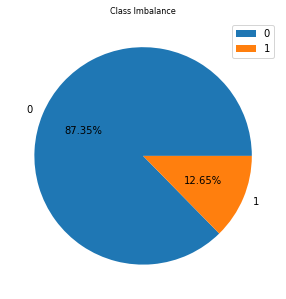

In [ ]:
#Plot using matplot library
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.pie(Class_Imbalance.Label.value_counts(),labels=['0','1'],autopct='%0.2f%%')
plt.title("Class Imbalance",fontsize=8)
plt.legend()
plt.show()

# **1.7 Binary calssification using Logistic Regression**

In [ ]:
#Using Logistic Regression
from pyspark.ml.classification import LogisticRegression
log_R = LogisticRegression(labelCol="Label", featuresCol="Standardized_features",weightCol="proportion_values", maxIter=10)
log_R_model=log_R.fit(training_datasheets)
indicator = log_R_model.transform(testing_datasheets)
indicator.show(5)

+-----+--------------------+---------------------+--------------------+--------------------+----------+
|Label|       Unsw_features|Standardized_features|       rawPrediction|         probability|prediction|
+-----+--------------------+---------------------+--------------------+--------------------+----------+
|    0|[53.0,44578.0,3.0...| [-1.5621464386345...|[0.73280153972457...|[0.67541974986484...|       0.0|
|    0|[80.0,8121.0,1.00...| [-1.5607923178798...|[0.28597111821139...|[0.57100951111528...|       0.0|
|    0|[80.0,42024.0,4.5...| [-1.5607923178798...|[2.00304827073448...|[0.88111675553109...|       0.0|
|    0|[111.0,59745.0,2....| [-1.5592375866428...|[1.42263883608253...|[0.80575176936069...|       0.0|
|    0|[138.0,138.0,2.7E...| [-1.5578834658881...|[-1.4234907384313...|[0.19411492914354...|       1.0|
+-----+--------------------+---------------------+--------------------+--------------------+----------+
only showing top 5 rows



In [73]:
indicator.select("Label","prediction").show(5)

+-----+----------+
|Label|prediction|
+-----+----------+
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       1.0|
+-----+----------+
only showing top 5 rows



# **1.8 Evaluating the BinaryClass Model**

In [ ]:
#Evaluation
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluation = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction",labelCol="Label",metricName="areaUnderROC")
areaUnderROC = evaluation.evaluate(indicator)
print("The area under ROC Curve is:",areaUnderROC)

The area under ROC Curve is: 0.8551880348018946


# **1.9 Measurements of BinaryClass Model**

In [34]:
#Finding TP,TN,FP,FN
True_positive = indicator[(indicator.Label==0)& (indicator.prediction==0)].count()
print("True positive rate is :",True_positive)
True_negative = indicator[(indicator.Label==1)& (indicator.prediction==1)].count()
print("True negative rate is :",True_negative)
False_positive = indicator[(indicator.Label==1)& (indicator.prediction==0)].count()
print("False positive rate is :",False_positive)
False_negative = indicator[(indicator.Label==0)& (indicator.prediction==1)].count()
print("False negative rate is :",False_negative)

True positive rate is : 560724
True negative rate is : 79359
False positive rate is : 16955
False negative rate is : 104745


In [35]:
#Calculating accuracy
accuracy = float((True_positive+True_negative)/(indicator.count()))
print("The Accuracy of the model is:",accuracy)

The Accuracy of the model is: 0.8402432188694156


In [36]:
#Measurements of the model 
label = indicator.select(['Label']).collect()
prediction = indicator.select(['prediction']).collect()

In [37]:
#Printing Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
Confusionmatrix = confusion_matrix(label,prediction)
print(Confusionmatrix)

[[560724 104745]
 [ 16955  79359]]


# **1.10 Data Visualization**

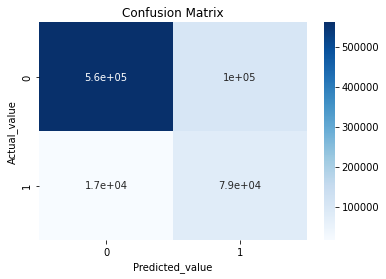

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(Confusionmatrix,cmap="Blues",annot=True,xticklabels=[0,1],yticklabels=[0,1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted_value")
plt.ylabel("Actual_value")
plt.show()

# **1.11 Classification Report**

In [39]:
#Classification report for binary class model
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(label, prediction))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90    665469
           1       0.43      0.82      0.57     96314

    accuracy                           0.84    761783
   macro avg       0.70      0.83      0.73    761783
weighted avg       0.90      0.84      0.86    761783



# **1.12 Data Visualization**

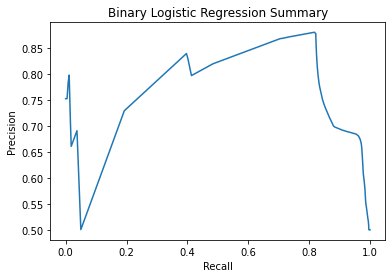

In [40]:
#Visualising the model
plt.title("Binary Logistic Regression Summary")
pr = log_R_model.summary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# **Machine Learning - Multi Classifier**

In [41]:
#For multi classification we include the target column attack_cat which contains more classes and remove the label column
multi_classify_datasheets = datasheets.select("sport","dsport","dur","Sload","Dload","Spkts","Dpkts","swin","dwin","stcpb","dtcpb","smeansz","dmeansz","attack_cat")

In [42]:
multi_classify_datasheets.show(5)

+-----+------+-----------+---------+---------+-----+-----+----+----+----------+----------+-------+-------+----------+
|sport|dsport|        dur|    Sload|    Dload|Spkts|Dpkts|swin|dwin|     stcpb|     dtcpb|smeansz|dmeansz|attack_cat|
+-----+------+-----------+---------+---------+-----+-----+----+----+----------+----------+-------+-------+----------+
|56716|   143| 0.82546002| 75090.25|156111.73|  122|  126| 255| 255|2751097753|2748686736|     64|    129|      null|
|43467| 49729|   0.101815|328438.84|5087030.5|   72|   74| 255| 255| 961515433|3225510659|     59|    887|      null|
|41289|  9574|0.044002999|488693.97|5181101.5|   44|   48| 255| 255|3291096757|1191410228|     63|    606|      null|
|43785|  6881|  2.7908299|29863.518|1130840.8|  180|  320| 255| 255|3934392726|3961690324|     58|   1237|      null|
|40691|  6881|  2.6335001|40381.238|1661560.6|  232|  438| 255| 255|   1518931|  18267719|     58|   1252|      null|
+-----+------+-----------+---------+---------+-----+----

In [43]:
#attack_cat column descriptive stastics
multi_classify_datasheets.select("attack_cat").describe().show()

+-------+----------+
|summary|attack_cat|
+-------+----------+
|  count|    321283|
|   mean|      null|
| stddev|      null|
|    min|  Analysis|
|    max|     Worms|
+-------+----------+



In [44]:
#counting the different number of attacks in the attack_cat column
multi_classify_datasheets.groupBy("attack_cat").count().show()

+---------------+-------+
|     attack_cat|  count|
+---------------+-------+
|          Worms|    174|
|           null|2218456|
|       Analysis|   2677|
|     Shellcode |   1288|
|            DoS|  16353|
|Reconnaissance |  12228|
|       Backdoor|   1795|
|       Fuzzers |  19195|
|       Exploits|  44525|
|        Generic| 215481|
|      Shellcode|    223|
|      Backdoors|    534|
|        Fuzzers|   5051|
| Reconnaissance|   1759|
+---------------+-------+



# **2.1 Data Preprocessing**

In [45]:
#Checking Null and Nan Values in our datasheets
from pyspark.sql.functions import col,isnan, when, count
multi_classify_datasheets.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in multi_classify_datasheets.columns]).show()

+-----+------+---+-----+-----+-----+-----+----+----+-----+-----+-------+-------+----------+
|sport|dsport|dur|Sload|Dload|Spkts|Dpkts|swin|dwin|stcpb|dtcpb|smeansz|dmeansz|attack_cat|
+-----+------+---+-----+-----+-----+-----+----+----+-----+-----+-------+-------+----------+
|    0|     0|  0|    0|    0|    0|    0|   0|   0|    0|    0|      0|      0|   2218456|
+-----+------+---+-----+-----+-----+-----+----+----+-----+-----+-------+-------+----------+



In [46]:
#In the attack column,null is considered as one of the type.But null is not the types of attacks. So we need to modify the null into 0 to develop a machine learning models.
multi_classify_datasheets = multi_classify_datasheets.fillna("0")

In [47]:
multi_classify_datasheets.show(5)

+-----+------+-----------+---------+---------+-----+-----+----+----+----------+----------+-------+-------+----------+
|sport|dsport|        dur|    Sload|    Dload|Spkts|Dpkts|swin|dwin|     stcpb|     dtcpb|smeansz|dmeansz|attack_cat|
+-----+------+-----------+---------+---------+-----+-----+----+----+----------+----------+-------+-------+----------+
|56716|   143| 0.82546002| 75090.25|156111.73|  122|  126| 255| 255|2751097753|2748686736|     64|    129|         0|
|43467| 49729|   0.101815|328438.84|5087030.5|   72|   74| 255| 255| 961515433|3225510659|     59|    887|         0|
|41289|  9574|0.044002999|488693.97|5181101.5|   44|   48| 255| 255|3291096757|1191410228|     63|    606|         0|
|43785|  6881|  2.7908299|29863.518|1130840.8|  180|  320| 255| 255|3934392726|3961690324|     58|   1237|         0|
|40691|  6881|  2.6335001|40381.238|1661560.6|  232|  438| 255| 255|   1518931|  18267719|     58|   1252|         0|
+-----+------+-----------+---------+---------+-----+----

In [48]:
#There are 9 types of attacks occurred 
#Hence same number of attacks like shellcode,Reconnaissance,Fuzzers,Backdoors repeated twice with slight difference
#We have to modify the attacks names
from pyspark.sql.functions import when,col
from pyspark.sql import functions as F
modify_attack_cat_column = (F.when(F.col('attack_cat') == "Shellcode ","Shellcode").otherwise(F.col('attack_cat')))
multi_classify_datasheets = multi_classify_datasheets.withColumn('attack_cat', modify_attack_cat_column)
modify_attack_cat_column = (F.when(F.col('attack_cat') == "Reconnaissance ","Reconnaissance").otherwise(F.col('attack_cat')))
multi_classify_datasheets = multi_classify_datasheets.withColumn('attack_cat', modify_attack_cat_column)
modify_attack_cat_column = (F.when(F.col('attack_cat') == "Backdoor","Backdoors").otherwise(F.col('attack_cat')))
multi_classify_datasheets = multi_classify_datasheets.withColumn('attack_cat', modify_attack_cat_column)
modify_attack_cat_column = (F.when(F.col('attack_cat') == "Fuzzers ","Fuzzers").otherwise(F.col('attack_cat')))
multi_classify_datasheets = multi_classify_datasheets.withColumn('attack_cat', modify_attack_cat_column)

In [49]:
multi_classify_datasheets.groupBy("attack_cat").count().show()

+--------------+-------+
|    attack_cat|  count|
+--------------+-------+
|         Worms|    174|
|             0|2218456|
|     Shellcode|   1511|
|     Backdoors|   2329|
|       Fuzzers|  24246|
|      Analysis|   2677|
|           DoS|  16353|
|Reconnaissance|  13987|
|      Exploits|  44525|
|       Generic| 215481|
+--------------+-------+



# **2.2 Vector Assembler**

In [50]:
#Hence our target column is to be the attack_cat column. so we have to remove it from the dataframe
#Lets assume our multi_classify_dataset columns into the list
list = multi_classify_datasheets.columns
list.remove("attack_cat")

In [51]:
#Using vector assembler we can combine all values into a single vector column
from pyspark.ml.feature import VectorAssembler
assembled = VectorAssembler(inputCols=list,outputCol="features_vector")
final_multi_classify_datasheets = assembled.transform(multi_classify_datasheets)

In [52]:
final_multi_classify_datasheets.select("features_vector").show(5,truncate=False)

+--------------------------------------------------------------------------------------------------------------+
|features_vector                                                                                               |
+--------------------------------------------------------------------------------------------------------------+
|[56716.0,143.0,0.82546002,75090.25,156111.73,122.0,126.0,255.0,255.0,2.751097753E9,2.748686736E9,64.0,129.0]  |
|[43467.0,49729.0,0.101815,328438.84,5087030.5,72.0,74.0,255.0,255.0,9.61515433E8,3.225510659E9,59.0,887.0]    |
|[41289.0,9574.0,0.044002999,488693.97,5181101.5,44.0,48.0,255.0,255.0,3.291096757E9,1.191410228E9,63.0,606.0] |
|[43785.0,6881.0,2.7908299,29863.518,1130840.8,180.0,320.0,255.0,255.0,3.934392726E9,3.961690324E9,58.0,1237.0]|
|[40691.0,6881.0,2.6335001,40381.238,1661560.6,232.0,438.0,255.0,255.0,1518931.0,1.8267719E7,58.0,1252.0]      |
+-----------------------------------------------------------------------------------------------

In [53]:
#We have combined all values in a single vector
#So we can remove the unnecessary columns from the dataframe
multi_classify_datasheets = final_multi_classify_datasheets.drop("sport","dsport","dur","Sload","Dload","Spkts","Dpkts","swin","dwin","stcpb","dtcpb","smeansz","dmeansz")
multi_classify_datasheets.show(5)

+----------+--------------------+
|attack_cat|     features_vector|
+----------+--------------------+
|         0|[56716.0,143.0,0....|
|         0|[43467.0,49729.0,...|
|         0|[41289.0,9574.0,0...|
|         0|[43785.0,6881.0,2...|
|         0|[40691.0,6881.0,2...|
+----------+--------------------+
only showing top 5 rows



# **2.3 String Indexer**

In [54]:
#Attack_cat column is of string type , so we have to convert the string type using stringindexer to perform the machine learning models
from pyspark.ml.feature import StringIndexer
indexing = StringIndexer(inputCol="attack_cat",outputCol="target_column")
multi_classify_datasheets = indexing.fit(multi_classify_datasheets).transform(multi_classify_datasheets)

In [55]:
multi_classify_datasheets.select('attack_cat','target_column').distinct().show()

+--------------+-------------+
|    attack_cat|target_column|
+--------------+-------------+
|       Fuzzers|          3.0|
|           DoS|          4.0|
|     Shellcode|          8.0|
|       Generic|          1.0|
|         Worms|          9.0|
|Reconnaissance|          5.0|
|             0|          0.0|
|      Exploits|          2.0|
|     Backdoors|          7.0|
|      Analysis|          6.0|
+--------------+-------------+



In [56]:
#Visualizing the distinct values of attack_cat
distinct_values = multi_classify_datasheets.toPandas()

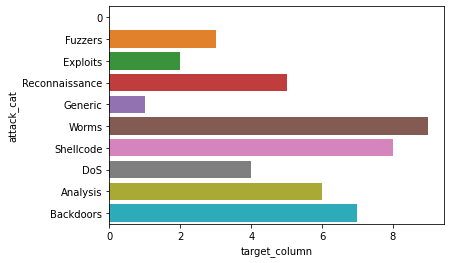

In [57]:
#Using Seaborn
import seaborn as sns
sns.barplot(x='target_column',y='attack_cat',data=distinct_values)

In [58]:
multi_classify_datasheets.show(5)

+----------+--------------------+-------------+
|attack_cat|     features_vector|target_column|
+----------+--------------------+-------------+
|         0|[56716.0,143.0,0....|          0.0|
|         0|[43467.0,49729.0,...|          0.0|
|         0|[41289.0,9574.0,0...|          0.0|
|         0|[43785.0,6881.0,2...|          0.0|
|         0|[40691.0,6881.0,2...|          0.0|
+----------+--------------------+-------------+
only showing top 5 rows



# **2.4 Train & Test DataSheets**

In [59]:
#Divide the data into test and train.
train_datasheets, test_datasheets = multi_classify_datasheets.randomSplit([0.7, 0.3], seed=12345)

# **2.5 Using NaiveBayes Classifier**

In [60]:
from pyspark.ml.classification import NaiveBayes
nbayes = NaiveBayes(featuresCol="features_vector",labelCol="target_column", smoothing=1.0, modelType="multinomial")
nbayes_model = nbayes.fit(train_datasheets)
nb_predictions = nbayes_model.transform(test_datasheets)
nb_predictions.show(5)

+----------+--------------------+-------------+--------------------+--------------------+----------+
|attack_cat|     features_vector|target_column|       rawPrediction|         probability|prediction|
+----------+--------------------+-------------+--------------------+--------------------+----------+
|         0|(13,[0,1,2,3,5,7,...|          0.0|[-2.0744815823742...|[0.0,1.0,0.0,0.0,...|       1.0|
|         0|(13,[0,1,2,3,5,7,...|          0.0|[-1.8423677438330...|[0.0,1.0,0.0,0.0,...|       1.0|
|         0|(13,[0,1,2,3,5,7,...|          0.0|[-4.1392588525432...|[0.0,1.0,0.0,0.0,...|       1.0|
|         0|(13,[0,1,2,3,5,7,...|          0.0|[-402788.44391964...|[0.0,0.0,0.0,0.0,...|       8.0|
|         0|(13,[0,1,2,3,5,7,...|          0.0|[-649991.46787476...|[0.0,0.0,0.0,0.0,...|       8.0|
+----------+--------------------+-------------+--------------------+--------------------+----------+
only showing top 5 rows



# **2.5.1 Evaluation**

In [61]:
#Evaluating the model
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluation_nb = MulticlassClassificationEvaluator(labelCol="target_column", predictionCol="prediction",metricName="accuracy")
accuracy = evaluation_nb.evaluate(nb_predictions)
print("The Accuracy of the model is :",accuracy)

The Accuracy of the model is : 0.7765557908223208


# **2.6 Ensembling-Bagging Using Random Forest Classifier**

In [62]:
#Bagging method
from pyspark.ml.classification import RandomForestClassifier
random_ft = RandomForestClassifier(featuresCol='features_vector',labelCol='target_column',numTrees=10)
random_ft_model = random_ft.fit(train_datasheets)
rft_predictions = random_ft_model.transform(test_datasheets)
rft_predictions.show(5)

+----------+--------------------+-------------+--------------------+--------------------+----------+
|attack_cat|     features_vector|target_column|       rawPrediction|         probability|prediction|
+----------+--------------------+-------------+--------------------+--------------------+----------+
|         0|(13,[0,1,2,3,5,7,...|          0.0|[5.94678033744661...|[0.59467803374466...|       0.0|
|         0|(13,[0,1,2,3,5,7,...|          0.0|[5.83295340523299...|[0.58329534052329...|       0.0|
|         0|(13,[0,1,2,3,5,7,...|          0.0|[5.30492680253350...|[0.53049268025335...|       0.0|
|         0|(13,[0,1,2,3,5,7,...|          0.0|[7.59514623809295...|[0.75951462380929...|       0.0|
|         0|(13,[0,1,2,3,5,7,...|          0.0|[7.59514623809295...|[0.75951462380929...|       0.0|
+----------+--------------------+-------------+--------------------+--------------------+----------+
only showing top 5 rows



# **2.6.1 Evaluation**

In [63]:
#Evaluating the model
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluation_rft = MulticlassClassificationEvaluator(labelCol="target_column", predictionCol="prediction")
accuracy = evaluation_rft.evaluate(rft_predictions)
print("The Accuracy of the model after bagging is: ",accuracy)

The Accuracy of the model after bagging is:  0.9499300017460022


In [64]:
#Since we have applied bagging method and the results clearly shows the accuracy performance was heightened

# **Evaluating the MultiClass Model**

In [65]:
#Evaluation for naivebayes classifier
from pyspark.mllib.evaluation import MulticlassMetrics
naivebayes_metric = MulticlassMetrics(nb_predictions['target_column','prediction'].rdd)

/usr/local/lib/python3.8/dist-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [66]:
print("Accuracy:",naivebayes_metric.accuracy)
print("Precision:",naivebayes_metric.precision(1.0))
print("Recall:",naivebayes_metric.recall(1.0))
print("F1Score:",naivebayes_metric.fMeasure(1.0))

Accuracy: 0.7765557908223208
Precision: 0.9857613117605043
Recall: 0.31697014783785266
F1Score: 0.479695038328


# **Measurements for Naive Bayes Classifier**

In [67]:
#Measurements of the model for Naive bayes Classifier
actual = nb_predictions.select(['target_column']).collect()
predicted = nb_predictions.select(['prediction']).collect()

# **Classification Report for Naive Bayes Classifier**

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(actual, predicted))

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.97      0.79      0.87    665469
         1.0       0.32      0.99      0.48     64402
         2.0       0.00      0.00      0.00     13297
         3.0       0.00      0.00      0.00      7394
         4.0       0.00      0.00      0.00      4951
         5.0       0.00      0.00      0.00      4250
         6.0       0.00      0.00      0.00       842
         7.0       0.00      0.00      0.00       695
         8.0       0.00      0.00      0.00       439
         9.0       0.00      0.16      0.00        44

    accuracy                           0.78    761783
   macro avg       0.13      0.19      0.14    761783
weighted avg       0.87      0.78      0.80    761783



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **After bagging**

In [69]:
#Evaluation for Random forest classifier
from pyspark.mllib.evaluation import MulticlassMetrics
randomft_metric = MulticlassMetrics(rft_predictions['target_column','prediction'].rdd)

/usr/local/lib/python3.8/dist-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [70]:
print("Accuracy:",randomft_metric.accuracy)
print("Precision:",randomft_metric.precision(1.0))
print("Recall:",randomft_metric.recall(1.0))
print("F1Score:",randomft_metric.fMeasure(1.0))

Accuracy: 0.9624551873696315
Precision: 0.9741312381603056
Recall: 0.9882953417665685
F1Score: 0.9811621742088348


# **Measurements for Random Forest Classifier**

In [71]:
#Measurements of the model for Random Forest Classifier
actual = rft_predictions.select(['target_column']).collect()
predicted = rft_predictions.select(['prediction']).collect()

# **Classification Report for Random Forest Classifier**

In [72]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(actual, predicted))

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98    665469
         1.0       0.99      0.97      0.98     64402
         2.0       0.45      0.40      0.42     13297
         3.0       1.00      0.00      0.00      7394
         4.0       0.00      0.00      0.00      4951
         5.0       0.00      0.00      0.00      4250
         6.0       0.00      0.00      0.00       842
         7.0       0.00      0.00      0.00       695
         8.0       0.00      0.00      0.00       439
         9.0       0.00      0.00      0.00        44

    accuracy                           0.96    761783
   macro avg       0.34      0.24      0.24    761783
weighted avg       0.95      0.96      0.95    761783



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Hence we applied Machine Learning algorithms for binary and multi class classification using pyspark coding.**